In [2]:
import urllib
from io import StringIO
from io import BytesIO
import csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import pandas as pd
import scipy.signal as signal

In [3]:
datos_2008 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2008.txt', sep=';')
datos_2009 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2009.txt',sep=';')
datos_2010 = pd.read_csv('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2010.txt',sep=';')
datos_2008.columns = ["Fecha 1", "Fecha 2", "Valor", "Monto"]
datos_2009.columns = ["Fecha 1", "Fecha 2", "Valor", "Monto"]
datos_2010.columns = ["Fecha 1", "Fecha 2", "Valor", "Monto"]

In [4]:
datos_2008["Fecha 1"]=pd.to_datetime(datos_2008["Fecha 1"],format='%d/%m/%Y %H:%M:%S')
datos_2008["Fecha 2"]=pd.to_datetime(datos_2008["Fecha 2"],format='%d/%m/%Y %H:%M:%S')-np.datetime64('1899-12-30')
datos_2008["Fecha 1"]=datos_2008["Fecha 1"]+datos_2008["Fecha 2"]
datos_2008.set_index(["Fecha 1"],inplace=True)

In [5]:
datos_2009["Fecha 1"]=pd.to_datetime(datos_2009["Fecha 1"],format='%d/%m/%Y %H:%M:%S')
datos_2009["Fecha 2"]=pd.to_datetime(datos_2009["Fecha 2"],format='%d/%m/%Y %H:%M:%S')-np.datetime64('1899-12-30')
datos_2009["Fecha 1"]=datos_2009["Fecha 1"]+datos_2009["Fecha 2"]
datos_2009.set_index(["Fecha 1"],inplace=True)

In [6]:
datos_2010["Fecha 1"]=pd.to_datetime(datos_2010["Fecha 1"],format='%d/%m/%Y %H:%M:%S')
datos_2010["Fecha 2"]=pd.to_datetime(datos_2010["Fecha 2"],format='%d/%m/%Y %H:%M:%S')-np.datetime64('1899-12-30')
datos_2010["Fecha 1"]=datos_2010["Fecha 1"]+datos_2010["Fecha 2"]
datos_2010.set_index(["Fecha 1"],inplace=True)

/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


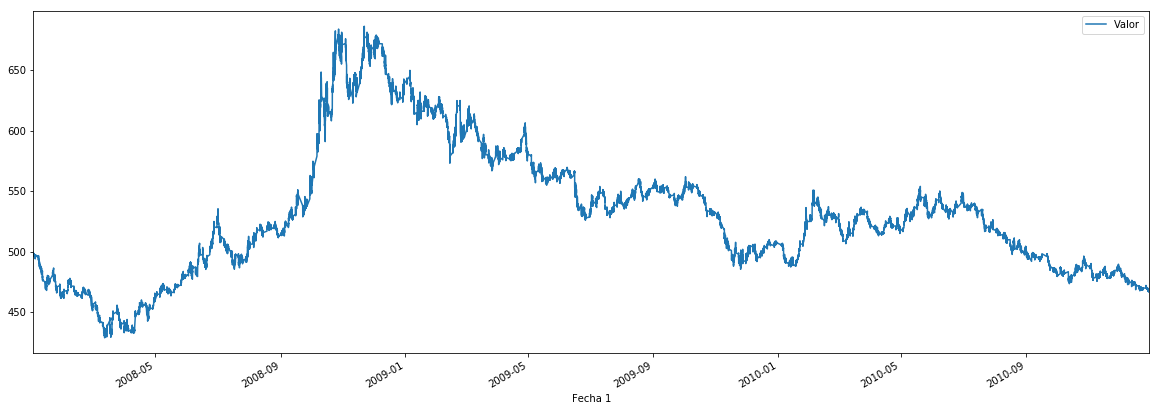

In [7]:
datos = pd.concat([datos_2008,datos_2009,datos_2010])
ndatos = datos[["Valor"]]
ndatos["Valor"] = pd.to_numeric(ndatos["Valor"].str.replace(",","."))
ndatos.to_csv("Datos_final.csv")
ndatos.plot(figsize=(20,7))

In [8]:
fechas = ndatos.index.values.transpose()
valores = ndatos.as_matrix().transpose().flatten()

(1358771,) (1358771,)


/srv/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5, 1.0, 'Ruido')

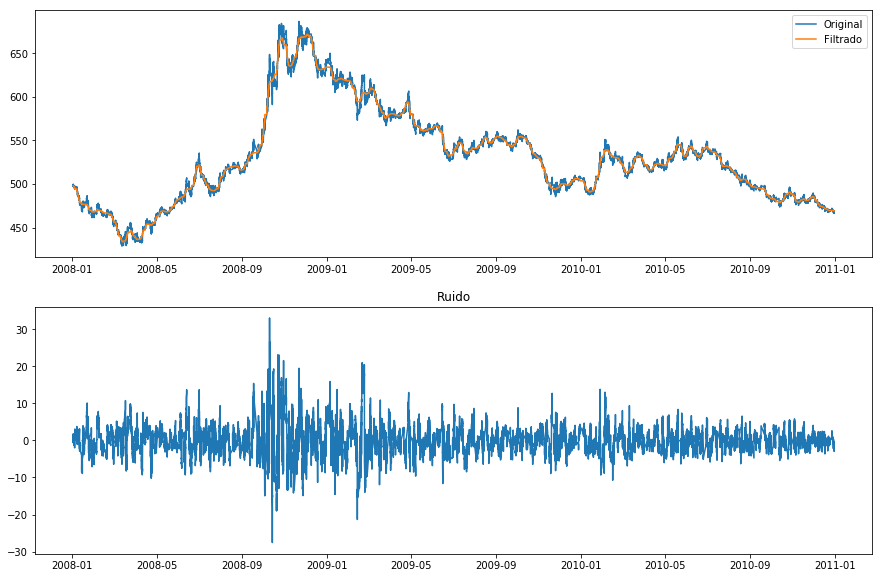

In [12]:
N  = 2    # Orden del filtro
Wn = 0.0001 # Corte de frecuancia
B, A = signal.butter(N, Wn)
valores_filtrada = signal.filtfilt(B,A, valores)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(fechas,valores, label="Original")
plt.plot(fechas,valores_filtrada, label= "Filtrado")
plt.legend()
plt.subplot(2,1,2)
ruido = valores-valores_filtrada
plt.plot(fechas,ruido)
plt.title("Ruido")

Text(0.5, 1.0, 'Función de correlación')

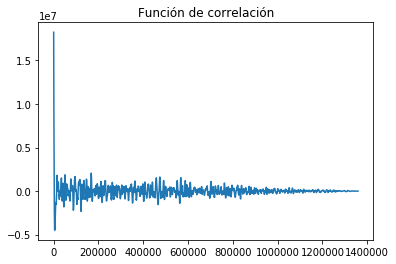

In [13]:
corr = signal.correlate(ruido,ruido,mode="full")
plt.figure(figsize=(10,5))
plt.plot(corr[len(corr)//2:])
plt.title("Función de correlación")

In [1]:
print("Si bien no hubo tiempo para probar más ajustes de filtrado, podemos ver que la correlación es muy baja, lo cual indica que el ruido obtenido se comporta do forma aleatoria, es decir el ajuste filtrado es bueno.")

Si bien no hubo tiempo para probar más ajustes de filtrado, podemos ver que la correlación es muy baja, lo cual indica que el ruido obtenido se comporta do forma aleatoria, es decir el ajuste filtrado es bueno.
